In [102]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr
import seaborn as sns
from datetime import date
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import scipy.stats as ss
from scipy.stats import skew
import math
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [103]:
TrainData = pd.read_csv('train.csv')
TestData = pd.read_csv('test.csv')


In [104]:
# Attempting a Different methodology when working with factor analysis.
# Since it's dimensional reduction, -- so I don't see a particular need to reduce features.
#TrainTarget = TrainData[['SalePrice']]
TrainTarget = TrainData['SalePrice']


In [105]:
TrainData.drop(['SalePrice'], axis =1, inplace=True) #So long as properly ordered, this will be fine.


In [106]:
TrainData.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [107]:
#Attempting maximum potential coverage of dummy variables.
TrainTest = TrainData.append(TestData) 
TrainTest.to_csv('TrainTestCheck1.csv')

In [108]:
TrainTest.select_dtypes(include='object').isnull().sum()[TrainTest.select_dtypes(include='object').isnull().sum()>0]

MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [109]:
TrainTest.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [110]:
for col in ('Alley','Utilities','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
            'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
           'PoolQC','Fence','MiscFeature'):
    TrainTest[col]=TrainTest[col].fillna('None')

In [111]:
TrainTest.select_dtypes(include='object').isnull().sum()[TrainTest.select_dtypes(include='object').isnull().sum()>0]

MSZoning       4
Exterior1st    1
Exterior2nd    1
KitchenQual    1
Functional     2
SaleType       1
dtype: int64

In [112]:
for col in ('MSZoning','Exterior1st','Exterior2nd','KitchenQual','SaleType','Functional'):
    TrainTest[col]=TrainTest[col].fillna(TrainTest[col].mode()[0])

In [113]:
TrainTest.select_dtypes(include=['int','float']).isnull().sum()[TrainTest.select_dtypes(include=['int','float']).isnull().sum()>0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [114]:
for col in ('LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea','GarageYrBlt'):
    TrainTest[col]=TrainTest[col].fillna(0)

In [115]:
#Harmonizing coding on 'Quality' metrics. Overall Qual is numeric, while these others are categorical.
#Ordinal assignments seem most appropriate for 9 point scales
for col in ('ExterQual','HeatingQC','FireplaceQu','GarageQual','KitchenQual','BsmtQual','BsmtCond','GarageCond','PoolQC'):
    TrainTest[col][TrainTest[col] == 'Ex'] = 9
    TrainTest[col][TrainTest[col] == 'Gd'] = 7
    TrainTest[col][TrainTest[col] == 'TA'] = 5
    TrainTest[col][TrainTest[col] == 'Fa'] = 3
    TrainTest[col][TrainTest[col] == 'Po'] = 1
    TrainTest[col][TrainTest[col] == 'NA'] = 0
    TrainTest[col][TrainTest[col] == 'None'] = 0
    TrainTest[col].astype('int64')

In [116]:
TrainTest.to_csv('TrainTestCheck2.csv')

In [117]:
TrainTest = pd.get_dummies(TrainTest,dummy_na=True)

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import GridSearchCV
transformer = FactorAnalysis(n_components=7, random_state=0)
TrainTest_transformed = transformer.fit_transform(TrainTest)
TrainTest_transformed.shape

In [118]:
Train = TrainTest.iloc[:1460]
Test = TrainTest.iloc[1460:]

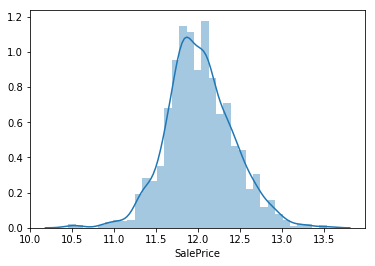

In [119]:
#sns.distplot(TrainData['TotRmsAbvGrd']);
#sns.distplot(TrainData['1stFlrSF']);
#sns.distplot(TrainData['OverallQual']);
#sns.distplot(TrainData['FullBath']);
#sns.distplot(TrainData['YearRemodAdd']);
#sns.distplot(TrainData['YearBuilt']);
#sns.distplot(TrainData['ExterQual']);
#sns.distplot(TrainData['LotFrontage']);
sns.distplot(np.log(TrainTarget));

In [120]:
sc=RobustScaler()
TrainTest=sc.fit_transform(TrainTest)

In [121]:
Train.to_csv('Traincheck.csv')
Test.to_csv('TestCheck.csv')
y=TrainTarget

In [122]:
y=np.log(y)
#Test = Test.iloc[:,1:]

In [123]:
#Setting Up a Poisson Regression Model -- statsmodels.genmod.families.family.Poisson
#Concept - dataset is right skewed. A regression that models a right-skewed distribution is worth investigating.
PoiReg = sm.GLM(y,Train,data=Train, family=sm.families.Poisson()).fit()
#mod1 = smf.glm(formula=formula, data=dta, family=sm.families.Binomial()).fit()

In [124]:
Test.iloc[:,1:].head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,1,0,0,0,0,0,1,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,1,0,0,0,0,0,1,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,1,0,0,0,0,0,1,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,1,0,0,0,0,0,1,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,1,0,0,0,0,0,1,0,0


In [125]:
Train.iloc[:,1:].head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,1,0,0,0,0,0,1,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,1,0,0,0,0,0,1,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,1,0,0,0,0,0,1,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,1,0,1,0,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,1,0,0,0,0,0,1,0,0


In [126]:
#print PoiReg.summary()
Result = pd.DataFrame(PoiReg.predict(Test))
Result = np.exp(Result)

In [127]:
Result.to_csv('resultreg10.csv')
#Output = pd.DataFrame({'Id':TestData[['Id']], 'SalePrice':Result})
#Output.to_csv('submissiontmb.csv', index=False)